<a href="https://colab.research.google.com/github/Puttu710/Data-Analytics/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import missingno as msno
import pylab as pl

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from google.colab import drive
drive.mount("/content/drive")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [ ]:
dataframe = pd.read_csv('/content/drive/My Drive/Datasets/Football/football_data.csv')
dataframe.columns  

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
dataframe.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Checking for Missing feature in the dataset 

In [ ]:
#checking whether there is null value in the data or not
dataframe.isnull().any()

Unnamed: 0        False
ID                False
Name              False
Age               False
Photo             False
                  ...  
GKHandling         True
GKKicking          True
GKPositioning      True
GKReflexes         True
Release Clause     True
Length: 89, dtype: bool

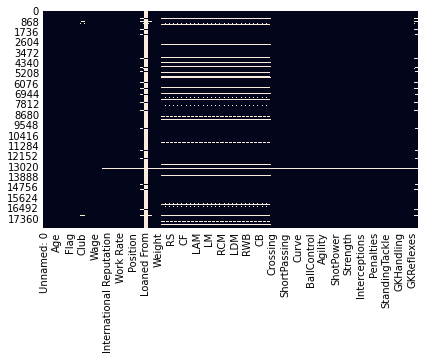

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(dataframe.isnull(), cbar=False)

In [ ]:
# dataframe = dataframe.drop(["Loaned From","Release Clause"],inplace=True, axis=1)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

## Data cleaning

In [ ]:
data = dataframe.drop('Loaned From', 1)

In [ ]:
data.shape

(18207, 88)

In [ ]:
# filling missing value with its mean for proper visualization
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)

In [ ]:
#Removing rows having missing values
data = data.dropna(how='any',axis=0) 

In [ ]:
data.shape

(14743, 88)

In [ ]:
#Now no columns having missing values
data.columns[data.isnull().any()]

Index([], dtype='object')

In [ ]:
#Dropping unnecessary feature.
data.drop(['Unnamed: 0','Photo','Flag','Club Logo','Release Clause','Joined'],axis=1,inplace=True)

def extract_value_from(Value):
    out = Value.replace('€', '')
    if 'M' in out:
      out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
      out = float(out.replace('K', ''))*1000
    return float(out)

data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))
data['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
4    355000.0
5    340000.0
Name: Wage, dtype: float64

In [ ]:
# For cleaning the weight and height data
data['Height'] = data['Height'].str.replace("'",".").astype(float)
data['Weight'] = data['Weight'].str.replace("lbs","").astype(float)

In [ ]:
print(data['Wage'])

0        565000.0
1        405000.0
2        290000.0
4        355000.0
5        340000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 14743, dtype: float64


##### Need to convert 79+1 values to an int,

 E.g. '79+1' should be 80 of type int

In [ ]:
fix_cols = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB','Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

 # converts string to int, applying any numerical operation
for col in fix_cols:
    data[col] = data[col].apply(lambda x : eval(str(x))) 

In [ ]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,...,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,2021,5.70,159.0,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,...,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,2022,6.20,183.0,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,...,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,2022,5.90,150.0,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,...,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,2023,5.11,154.0,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,...,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,2020,5.80,163.0,86,86,86,92,91,91,91,92,92,92,92,92,85,85,85,92,69,66,...,69,63,52,52,52,63,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


## Data Visualization

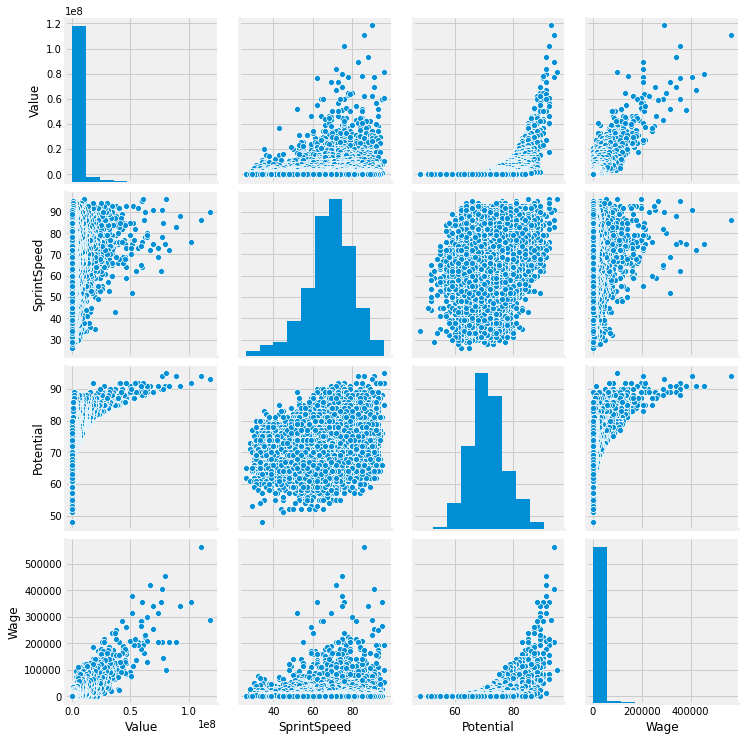

In [ ]:
g = sns.pairplot(data[['Value','SprintSpeed','Potential','Wage']])

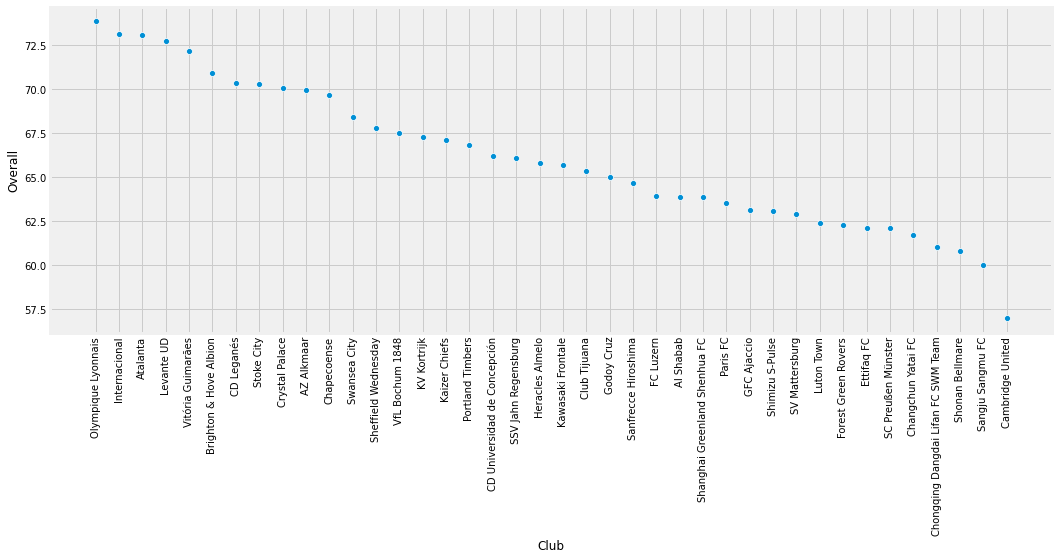

In [ ]:
data2 = data.groupby('Club', as_index=False)['Overall'].mean()
data2 = data2.sort_values(by=["Overall"],ascending=False)
data3 = data2.sample(n=40)
data3 = data3.sort_values(by=["Overall"],ascending=False)
# data3.head()

f, ax = plt.subplots(figsize=(16, 6))
sns.scatterplot(x=data3["Club"],y=data3["Overall"],ax=ax)
plt.xticks(rotation='vertical')
#plt.xlim(9000, 200000000)
plt.show()

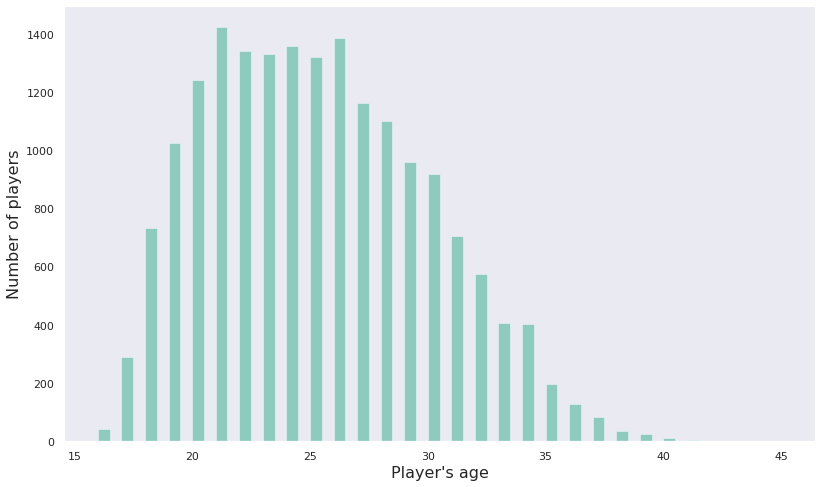

In [ ]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = dataframe.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
plt.show()

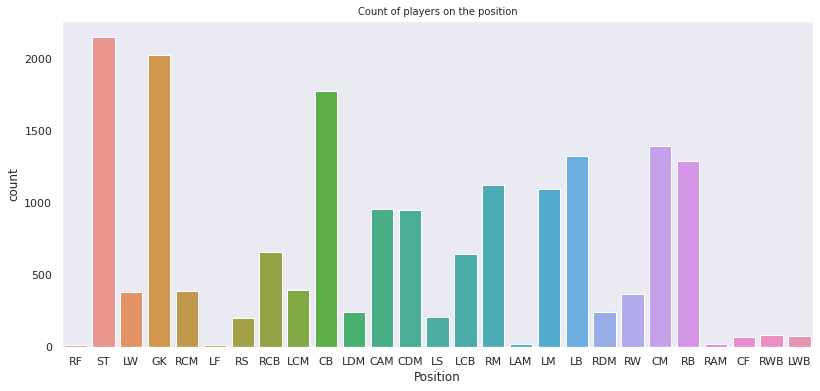

In [ ]:
# count of players and their positions
plt.figure(figsize=(12,6))
ax = sns.countplot(x = 'Position', data = dataframe);
ax.set_title(label='Count of players on the position', fontsize=10);

In [ ]:
# sns.pairplot(data[['Age', 'Overall', 'Potential', 'Finishing', 'ShotPower', 'LongShots', 'Penalties', 'FKAccuracy']]);

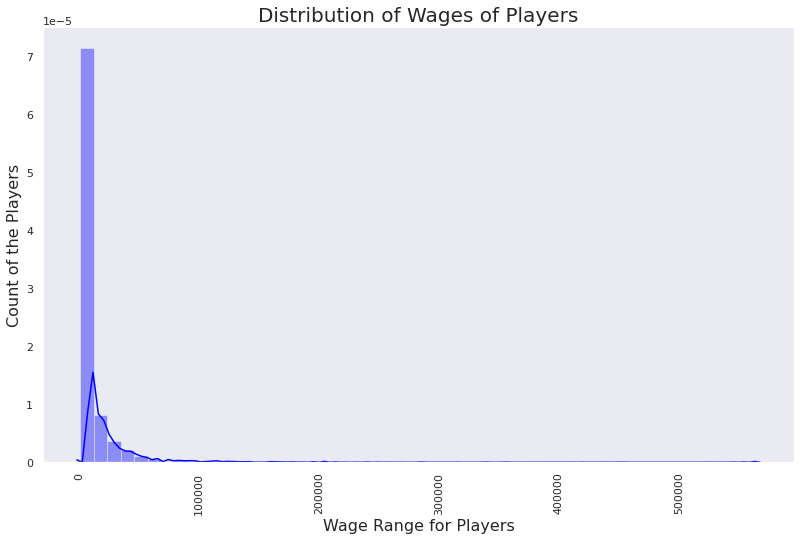

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(12,8))
sns.distplot(data['Wage'], color = 'blue')
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Distribution of Wages of Players', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

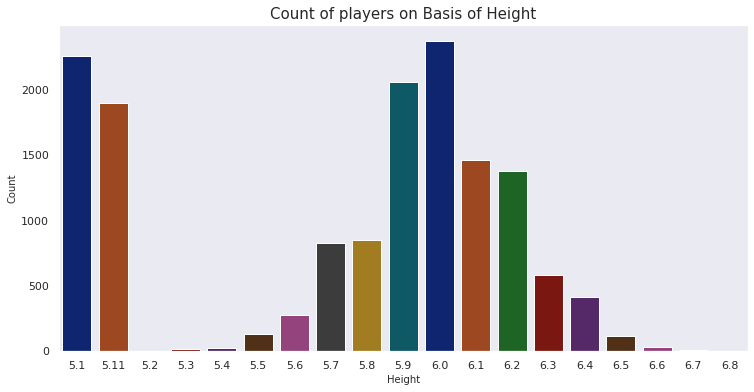

In [ ]:
# Height of Players

plt.figure(figsize = (11, 6))
ax = sns.countplot(x = 'Height', data = data, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 15)
ax.set_xlabel(xlabel = 'Height', fontsize = 10)
ax.set_ylabel(ylabel = 'Count', fontsize = 10)
plt.show()

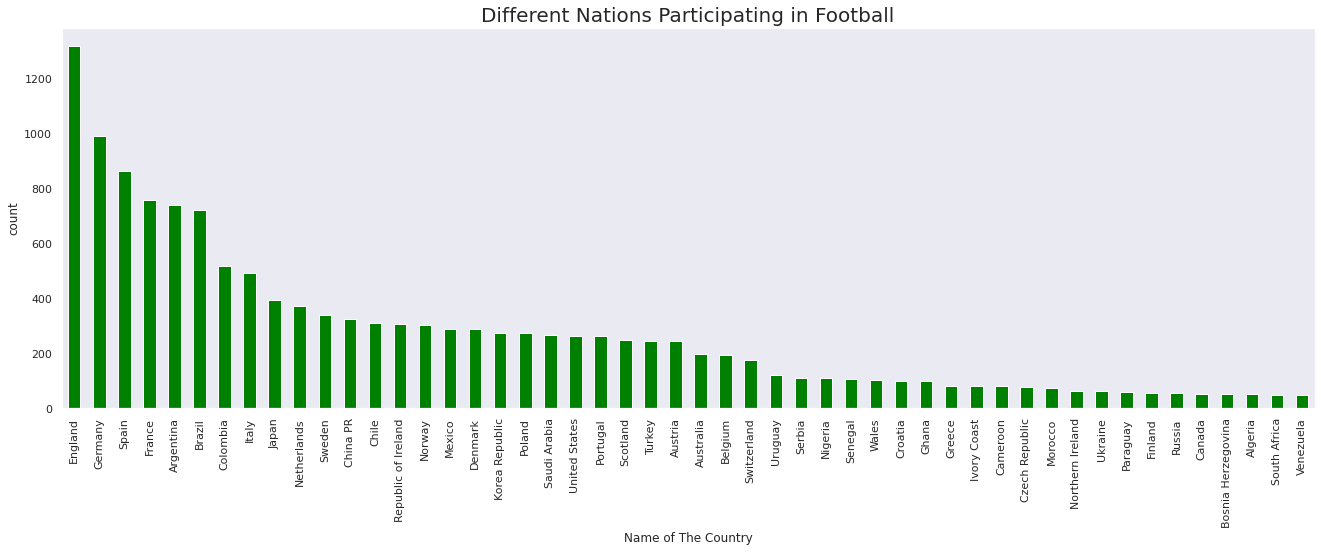

In [ ]:
# To show Nationality of participants in football 
data['Nationality'].value_counts().head(50).plot.bar(color = 'Green', figsize = (20, 7))
plt.title('Different Nations Participating in Football', fontsize = 20)
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.show()

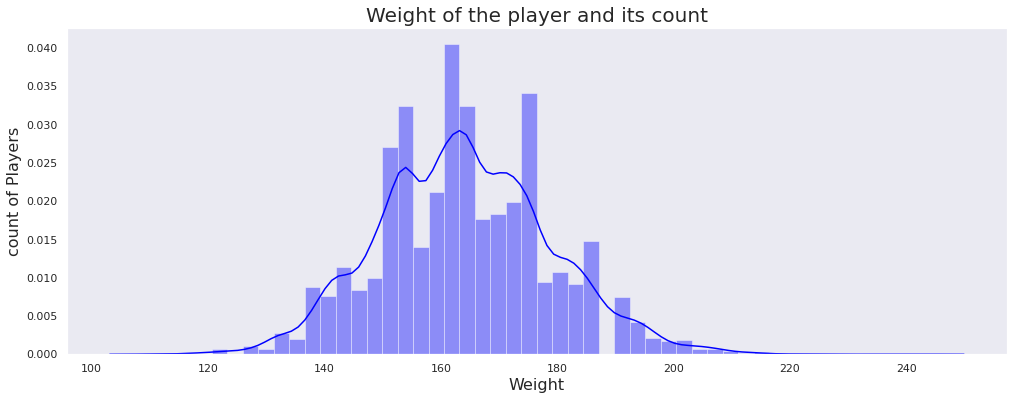

In [ ]:
# To show Different body weight of the players in the Football
import sklearn.cluster as cluster
plt.figure(figsize = (15, 6))
# plt.style.use('_classic_test')
sns.distplot(data['Weight'], color = 'Blue')
plt.title('Weight of the player and its count', fontsize = 20)
plt.xlabel('Weight', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

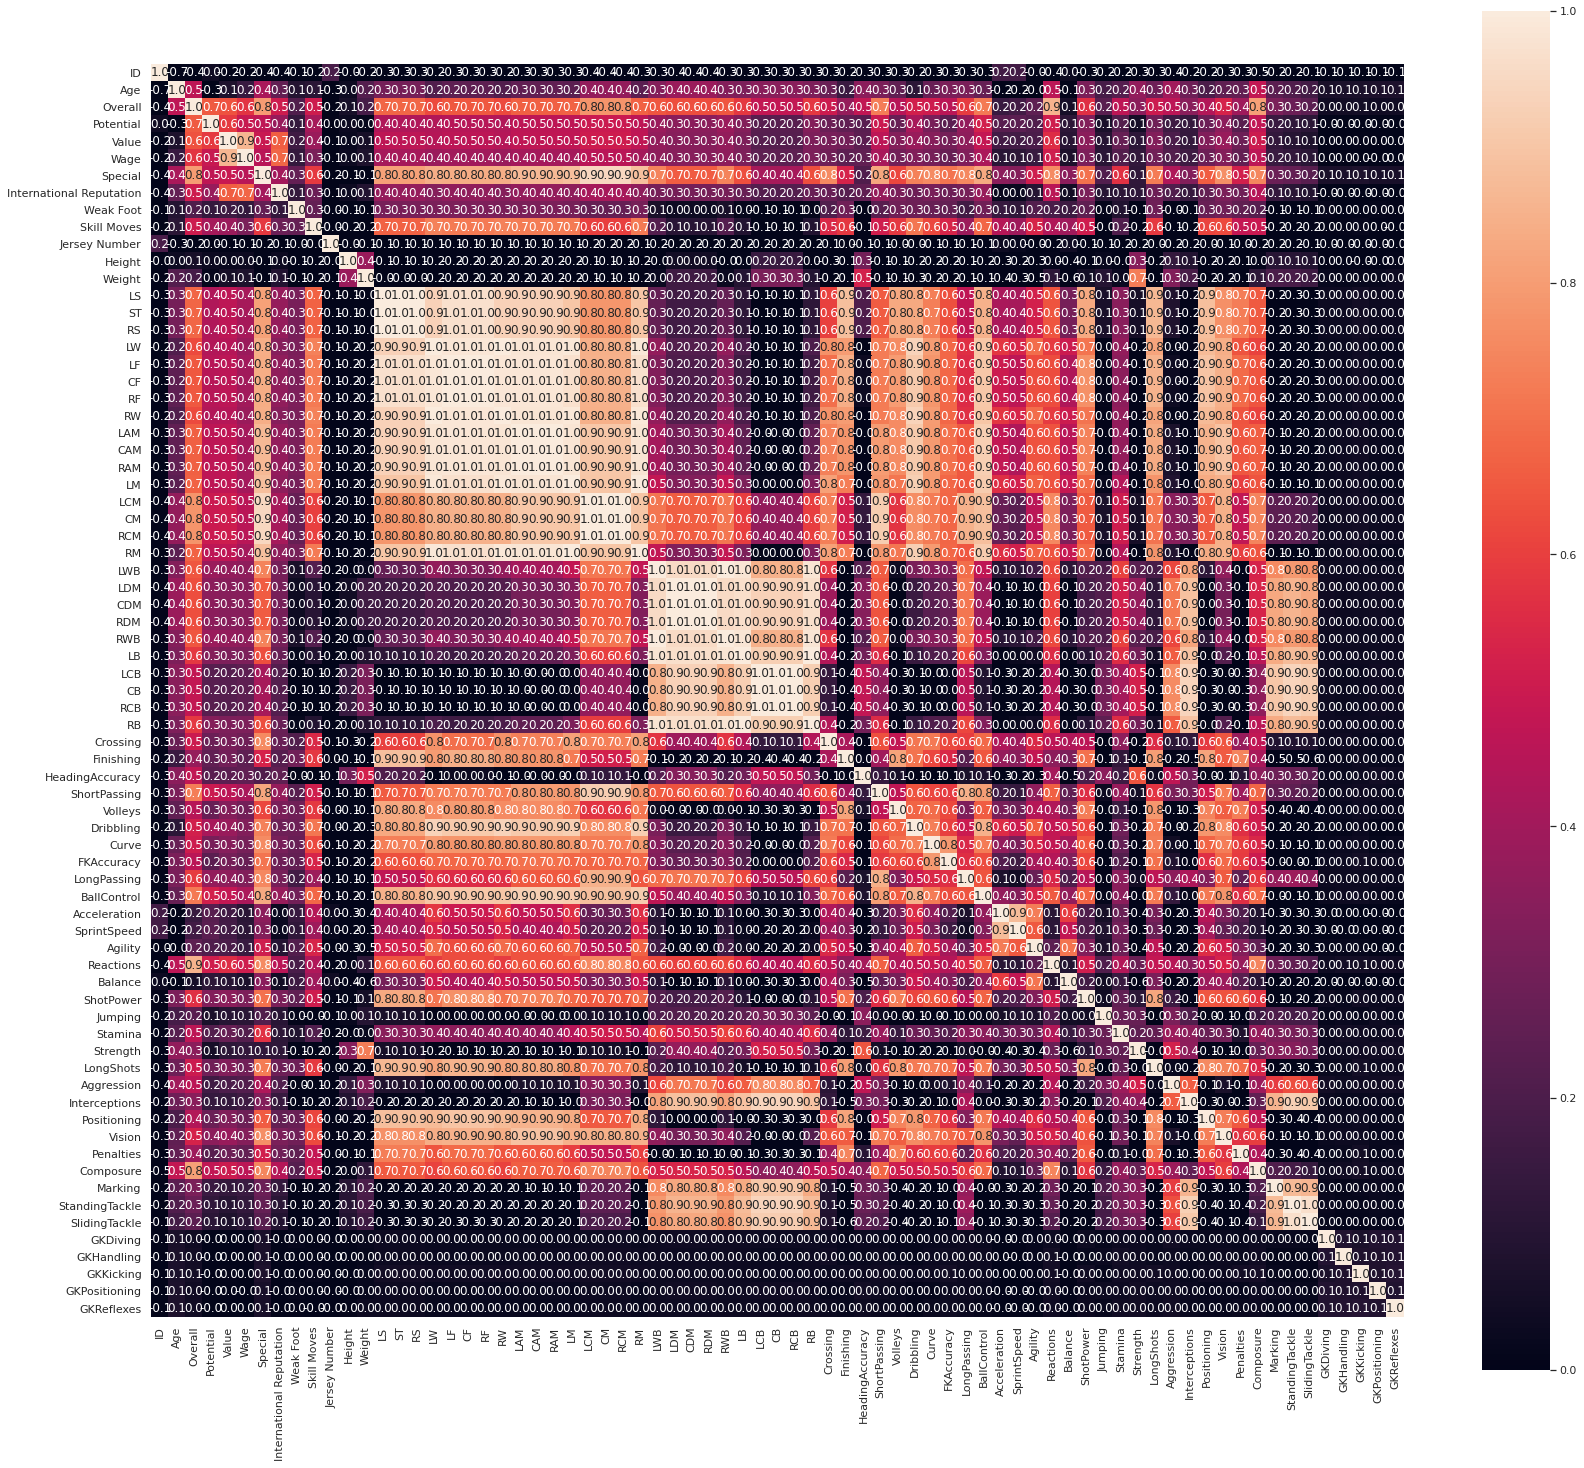

In [ ]:
#Correlation matrix & Heatmap
pl.figure(figsize =(25,25))
corrmat = data.corr()
sns.heatmap(corrmat, annot=True, fmt='.1f', vmin=0, vmax=1, square=True);

# Optimizing Dataset

remove highly correlated features

In [ ]:
import numpy as np

# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [ ]:
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Contract Valid Until', 'Height', 'Weight',
       'LWB', 'Crossing', 'HeadingAccuracy', 'Curve', 'FKAccuracy',
       'Acceleration', 'Agility', 'Balance', 'Jumping', 'Stamina', 'Strength',
       'Aggression', 'Penalties', 'GKDiving', 'GKHandling', 'GKKicking',
       'GKPositioning', 'GKReflexes'],
      dtype='object')

In [ ]:
# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/





# K-Means Clustering


### 

In [ ]:
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Contract Valid Until', 'Height', 'Weight',
       'LWB', 'Crossing', 'HeadingAccuracy', 'Curve', 'FKAccuracy',
       'Acceleration', 'Agility', 'Balance', 'Jumping', 'Stamina', 'Strength',
       'Aggression', 'Penalties', 'GKDiving', 'GKHandling', 'GKKicking',
       'GKPositioning', 'GKReflexes'],
      dtype='object')

####  implementing 

In [ ]:
#Labeling data on the basis of whole featureset mean value; If player's total score is > aggr_mean then Above-average Players Else 'Below-average Players'
labels=pd.DataFrame(np.where(round((data_1.sum(axis=1)/2900)*100,2) > aggr_mean, 'Above-average Players', 'Below-average Players'))

In [ ]:
#Mean normalization of data
data_1 = data_1.sub(data_1.mean(axis=0), axis=1)

In [ ]:
#Converting dataframe to matrix
data_mat = np.asmatrix(data_1)
data_mat

matrix([[ 29.84921658,  45.44516042,  13.01092044, ..., -18.46476294,
         -24.11510547, -23.83816048],
        [ 29.84921658,  44.44516042,  32.01092044, ..., -23.46476294,
         -21.11510547, -26.83816048],
        [ 24.84921658,  37.44516042,   5.01092044, ..., -24.46476294,
         -28.11510547, -16.83816048],
        ...,
        [-29.15078342,  -9.55483958, -10.98907956, ..., -19.46476294,
         -39.11510547, -38.83816048],
        [-10.15078342,   0.44516042, -17.98907956, ..., -31.46476294,
         -27.11510547, -22.83816048],
        [-13.15078342, -15.55483958, -10.98907956, ..., -11.46476294,
          -9.11510547,   0.16183952]])

In [ ]:
# sigma = 1/df_a_mat.shape[0] * np.dot(df_a_mat.transpose(),df_a_mat)
sigma = np.cov(data_mat.T)
sigma

array([[ 200.61781362,   97.02812316,  -20.84077628,   88.46108733,
          99.95789442,  126.97022657,  154.49198342,  132.79290555,
         104.51912949,   97.76580044,   72.97327034,   63.90756625,
          95.46106575,   58.58240313,   74.82172276,   86.76901113,
          -3.61412183,   57.03518042,  -29.85037536,  123.09011983,
          23.32001425,   34.95320306,  122.6932524 ,  118.25442453,
          66.76273382,   68.83620807,   22.26711654,   24.25363726,
          22.43296495],
       [  97.02812316,  267.14878661,    0.58345741,   64.6030021 ,
         197.1985868 ,  144.94434998,  152.65237861,  133.53852595,
          46.07146175,  106.08839387,   71.60843818,   65.12847043,
          96.96663878,   51.27032165,   62.67769541,  152.11798594,
         -11.02990629,   23.29257125,  -25.92072632,  206.91203736,
         -44.46069053, -147.63028314,  196.6596718 ,  139.18225794,
         152.29945296,   69.29321333, -138.60770322, -171.3579272 ,
        -180.12055032],


In [ ]:
sigma.shape

(29, 29)

In [ ]:
#Calculating eigen values and eigen vectors
eigVals, eigVec = np.linalg.eig(sigma)

In [ ]:
#Sorting eigen values in decreasing order
sorted_index = eigVals.argsort()[::-1] 
eigVals = eigVals[sorted_index]
eigVec = eigVec[:,sorted_index]
eigVals

array([2167.68876038, 1466.86927629,  466.53173576,  256.81711302,
        120.84081666,  102.41881652,   85.26705323,   80.98329028,
         73.60182563,   70.79175701,   63.00807602,   52.44070451,
         48.65159083,   47.20282526,   43.67748014,   40.73491073,
         38.34001079,   34.80052638,   34.12915956,   31.97368781,
         30.74286356,   29.18975561,   27.67251019,   25.24196484,
         19.94506481,   14.95416316,   14.48479728,   11.12824604,
          9.30489632])

#  Hierarchical Clustering

#### Agglomerative Hierarchical Clustering

1.   It works from the dissimilarities between the objects to be grouped together. A type of dissimilarity can be suited to the subject studied and the nature of the data.
2.   One of the results is the dendrogram which shows the progressive grouping of the data. It is then possible to gain an idea of a suitable number of classes into which the data can be grouped.

#### How does Agglomerative Hierarchical Clustering work

1.   The process starts by calculating the dissimilarity between the N objects.
2.   Then two objects which when clustered together minimize a given agglomeration criterion, are clustered together thus creating a class comprising these two objects.
3. Then the dissimilarity between this class and the N-2 other objects is calculated using the agglomeration criterion
4. The two objects or classes of objects whose clustering together minimizes the agglomeration criterion are then clustered together.

This process continues until all the objects have been clustered.
These successive clustering operations produce a binary clustering tree (dendrogram)








#### Agglomerative Clustering

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 

In [ ]:
data.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Contract Valid Until,Height,Weight,LWB,Crossing,HeadingAccuracy,Curve,FKAccuracy,Acceleration,Agility,Balance,Jumping,Stamina,Strength,Aggression,Penalties,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,2021,5.70,159.0,66,84.0,70.0,93.0,94.0,91.0,91.0,95.0,68.0,72.0,59.0,48.0,75.0,6.0,11.0,15.0,14.0,8.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,2022,6.20,183.0,68,84.0,89.0,81.0,76.0,89.0,87.0,70.0,95.0,88.0,79.0,63.0,85.0,7.0,11.0,15.0,14.0,11.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,2022,5.90,150.0,68,79.0,62.0,88.0,87.0,94.0,96.0,84.0,61.0,81.0,49.0,56.0,81.0,9.0,9.0,15.0,15.0,11.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,2023,5.11,154.0,80,93.0,55.0,85.0,83.0,78.0,79.0,77.0,63.0,90.0,75.0,76.0,79.0,15.0,13.0,5.0,10.0,13.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,Yes,LF,10.0,2020,5.80,163.0,69,81.0,61.0,83.0,79.0,94.0,95.0,94.0,56.0,83.0,66.0,54.0,86.0,11.0,12.0,6.0,8.0,8.0


In [ ]:
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face',
       'Position', 'Jersey Number', 'Contract Valid Until', 'Height', 'Weight',
       'LWB', 'Crossing', 'HeadingAccuracy', 'Curve', 'FKAccuracy',
       'Acceleration', 'Agility', 'Balance', 'Jumping', 'Stamina', 'Strength',
       'Aggression', 'Penalties', 'GKDiving', 'GKHandling', 'GKKicking',
       'GKPositioning', 'GKReflexes'],
      dtype='object')

In [ ]:
cols = ['Crossing', 'HeadingAccuracy', 'Curve', 'FKAccuracy',
       'Acceleration', 'Agility', 'Balance', 'Jumping', 'Stamina', 'Strength',
       'Aggression', 'Penalties', 'GKDiving', 'GKHandling', 'GKKicking',
       'GKPositioning', 'GKReflexes']
data_x = data[cols]

In [ ]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(data_x) 

# Normalizing the data so that the data approximately 
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 

# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 


In [ ]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

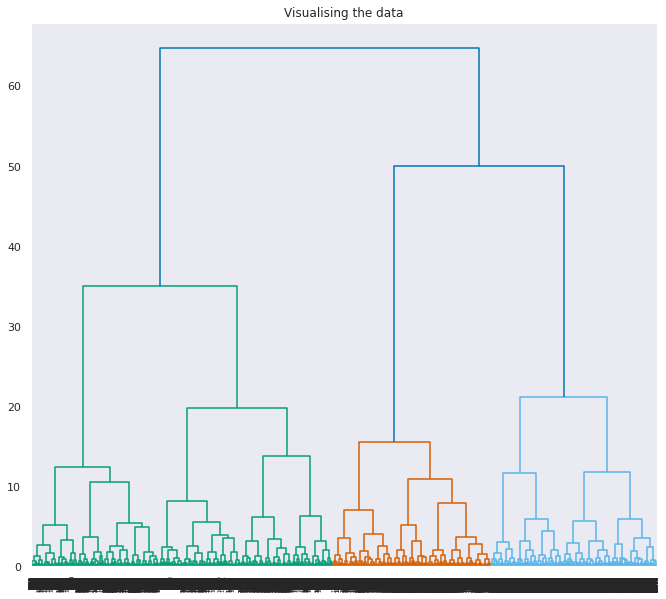

In [ ]:
plt.figure(figsize =(10, 10)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 


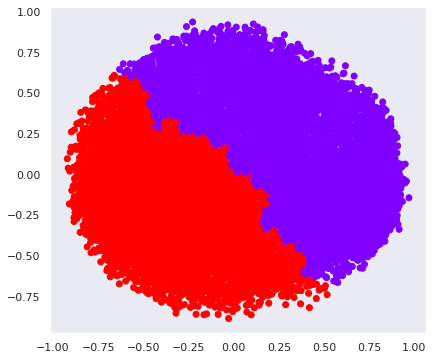

In [ ]:
ac2 = AgglomerativeClustering(n_clusters = 2) 

# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

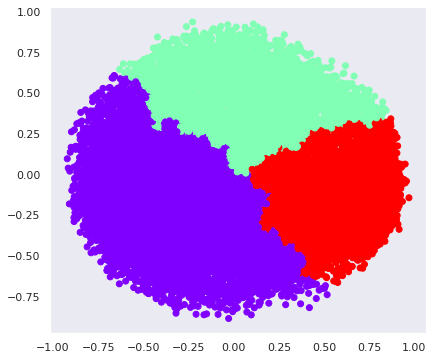

In [ ]:
ac3 = AgglomerativeClustering(n_clusters = 3) 

plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
		c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

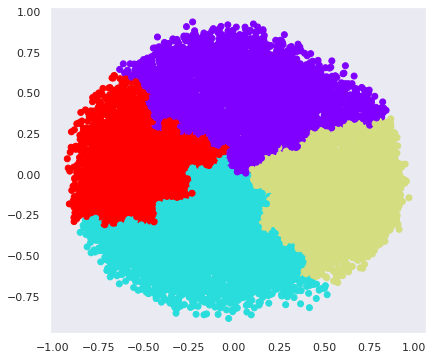

In [ ]:
ac4 = AgglomerativeClustering(n_clusters = 4) 

plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
			c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


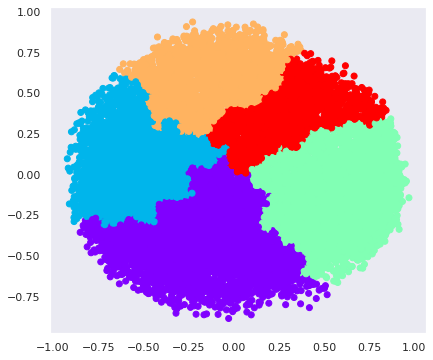

In [ ]:
ac5 = AgglomerativeClustering(n_clusters = 5) 

plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
			c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


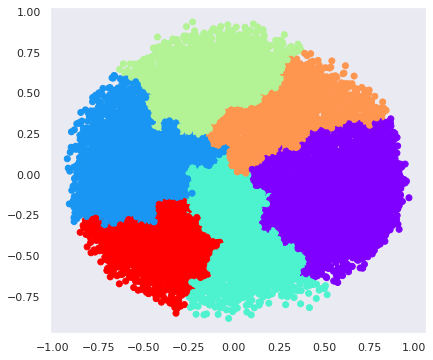

In [ ]:
ac6 = AgglomerativeClustering(n_clusters = 6) 

plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
			c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


##### Identifying optimal number of cluster

We now determine the optimal number of clusters using a mathematical technique. We will use the Silhouette Scores for the purpose.

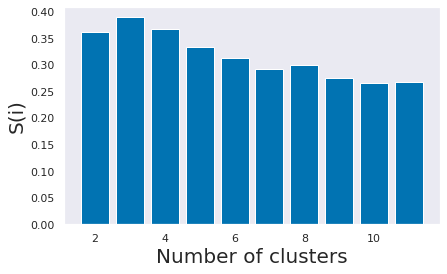

In [ ]:
# Step 7: Evaluating the different models and Visualizing the results.

ac7 = AgglomerativeClustering(n_clusters = 7) 
ac8 = AgglomerativeClustering(n_clusters = 8) 
ac9 = AgglomerativeClustering(n_clusters = 9) 
ac10 = AgglomerativeClustering(n_clusters = 10) 
ac11 = AgglomerativeClustering(n_clusters = 11) 


k = [2, 3, 4, 5, 6,7,8,9,10,11] 

# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append(silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append(silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append(silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append(silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
silhouette_scores.append(silhouette_score(X_principal, ac7.fit_predict(X_principal))) 
silhouette_scores.append(silhouette_score(X_principal, ac8.fit_predict(X_principal))) 
silhouette_scores.append(silhouette_score(X_principal, ac9.fit_predict(X_principal))) 
silhouette_scores.append(silhouette_score(X_principal, ac10.fit_predict(X_principal)))
silhouette_scores.append(silhouette_score(X_principal, ac11.fit_predict(X_principal))) 

# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 


In [ ]:
# So the optimal number of cluster is 3

#### Divisive clustering

top-down approach. This algorithm also does not require to prespecify the number of clusters

# DBSCAN
#### Density-Based Spatial Clustering of Applications with Noise






### Preprocessing Data

In [ ]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled1 = scaler.fit_transform(data_x) 

# Normalizing the data so that 
# the data approximately follows a Gaussian distribution 
X_normalized1 = normalize(X_scaled1) 

# Converting the numpy array into a pandas DataFrame 
X_normalized1 = pd.DataFrame(X_normalized1) 


In [ ]:
pca = PCA(n_components = 2) 
X_principal1 = pca.fit_transform(X_normalized1) 
X_principal1 = pd.DataFrame(X_principal1) 
X_principal1.columns = ['P1', 'P2'] 
# print(X_principal1.head()) 


In [ ]:
# Numpy array of all the cluster labels assigned to each data point 
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal1) 
labels = db_default.labels_ 

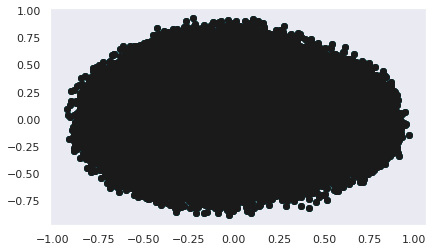

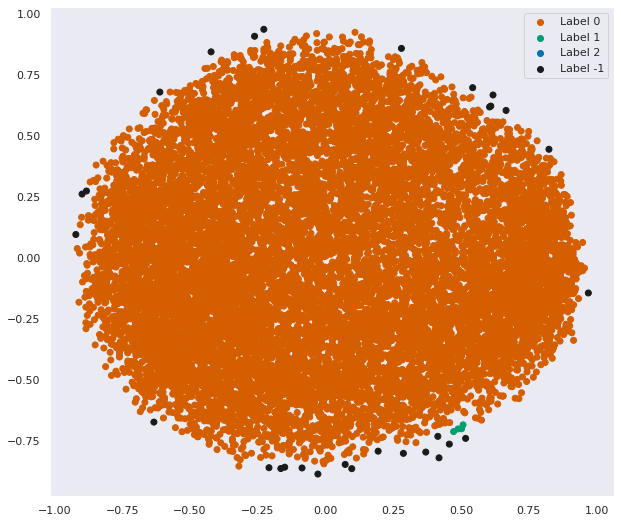

In [ ]:
#Visualizing the clustering 

# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 

# For the construction of the legend of the plot 
r = plt.scatter(X_principal1['P1'], X_principal1['P2'], color ='r'); 
g = plt.scatter(X_principal1['P1'], X_principal1['P2'], color ='g'); 
b = plt.scatter(X_principal1['P1'], X_principal1['P2'], color ='b'); 
k = plt.scatter(X_principal1['P1'], X_principal1['P2'], color ='k'); 

# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal1['P1'], X_principal1['P2'], c = cvec) 

# Building the legend 
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 

plt.show() 

In [ ]:
db = DBSCAN(eps = 0.0000375, min_samples = 10).fit(X_principal1) 
labels1 = db.labels_ 

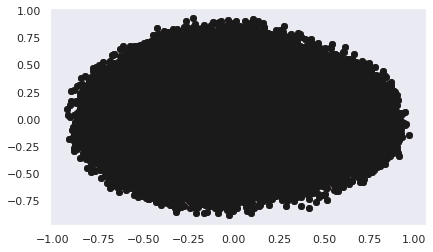

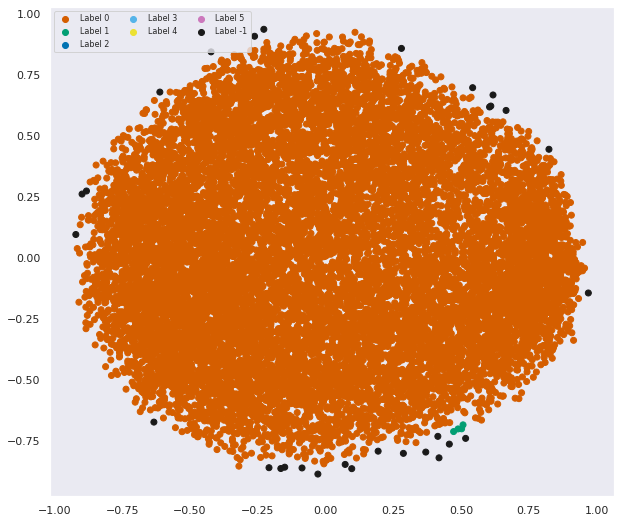

In [ ]:
colours1 = {} 
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels] 
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 

r = plt.scatter( 
		X_principal1['P1'], X_principal1['P2'], marker ='o', color = colors[0]) 
g = plt.scatter( 
		X_principal1['P1'], X_principal1['P2'], marker ='o', color = colors[1]) 
b = plt.scatter( 
		X_principal1['P1'], X_principal1['P2'], marker ='o', color = colors[2]) 
c = plt.scatter( 
		X_principal1['P1'], X_principal1['P2'], marker ='o', color = colors[3]) 
y = plt.scatter( 
		X_principal1['P1'], X_principal1['P2'], marker ='o', color = colors[4]) 
m = plt.scatter( 
		X_principal1['P1'], X_principal1['P2'], marker ='o', color = colors[5]) 
k = plt.scatter( 
		X_principal1['P1'], X_principal1['P2'], marker ='o', color = colors[6]) 

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal1['P1'], X_principal1['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k),('Label 0', 'Label 1', 'Label 2', 'Label 3' ,'Label 4','Label 5', 'Label -1'),
		scatterpoints = 1, 
		loc ='upper left', 
		ncol = 3, 
		fontsize = 8) 
plt.show() 


----